In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from utilsTopology import *
from utilsBaricentricNetwork import *

2024-11-28 16:31:06.214123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732807866.246596   56058 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732807866.256370   56058 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 16:31:06.333051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Ejemplo CPLF generación dado dos puntos

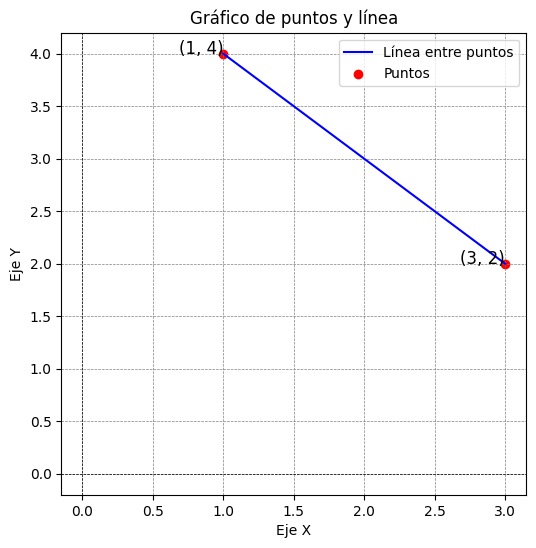

In [2]:
# Coordenadas de los puntos
x1, y1 = 1, 4
x2, y2 = 3, 2

# Crear el gráfico
plt.figure(figsize=(6, 6))
plt.plot([x1, x2], [y1, y2], 'b-', label="Línea entre puntos")  # Línea que conecta los puntos
plt.scatter([x1, x2], [y1, y2], color='red', label="Puntos")    # Puntos

# Etiquetas de los puntos
plt.text(x1, y1, f"({x1}, {y1})", fontsize=12, ha='right')
plt.text(x2, y2, f"({x2}, {y2})", fontsize=12, ha='right')

# Configuración del gráfico
plt.title("Gráfico de puntos y línea")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.axhline(0, color='black',linewidth=0.5, linestyle="--")  # Línea horizontal en 0
plt.axvline(0, color='black',linewidth=0.5, linestyle="--")  # Línea vertical en 0
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# Lema, Conjetura y Teoremas pruebas aproximación CPLF usando puntos mediante baricentric neural network

## Lema 1: Función creciente

$f(x) = m*x + n$, con m = 1 y n = 1, en $x \in [1,3]$

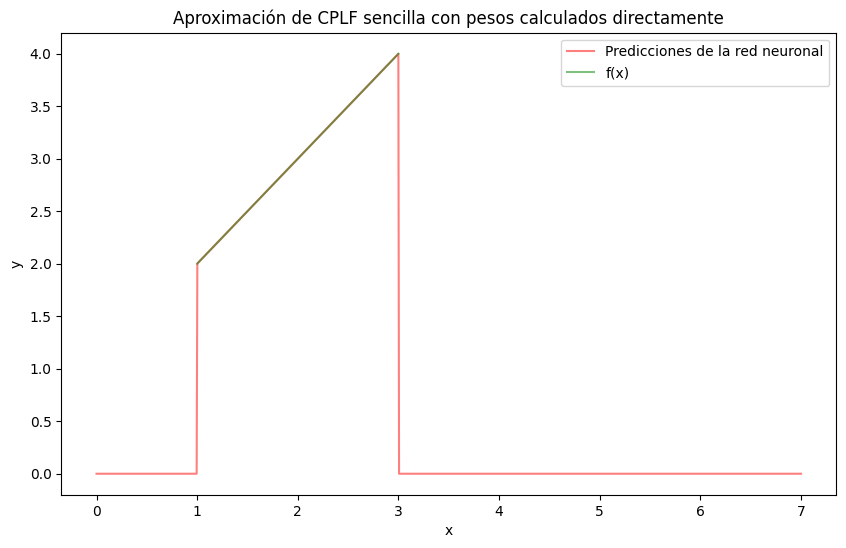

In [5]:
points = [[1,2],[3,4]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()


## Lema 1 Decreciente

$f(x) = m*x + n$, con m = -1 y n = 5, en $x \in [1,3]$

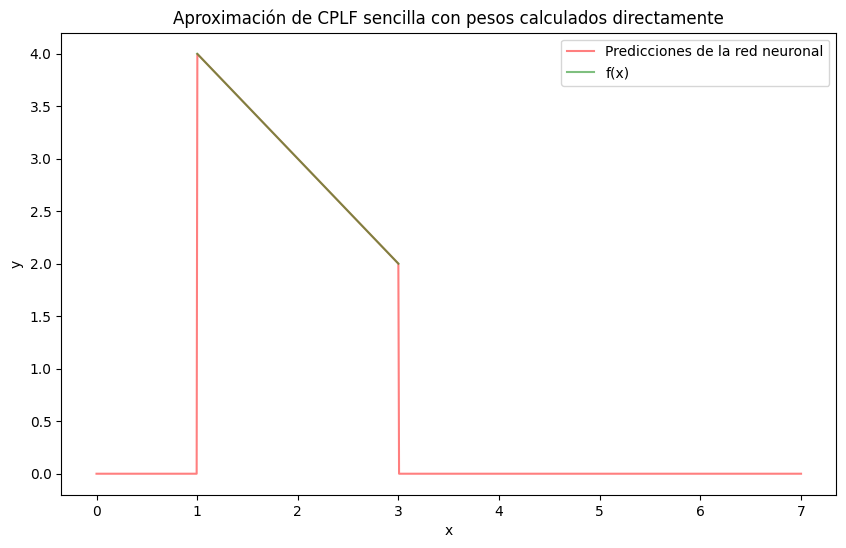

In [6]:
points = [[1,4],[3,2]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

## Conjetura 1: 
Pendiente de la segunda función es mayor que la pendiente de la primera función, es decir supongamos que nuestra CPLF está formada por dos funciones lineales.

### Función CPLF formada por dos funciones lineales crecientes

$f1(x) = m1*x + n1$, con m = 1 y n = 1, en $x \in [1,3]$

$f2(x) = m2*x + n2$, con m = 2 y n = -2, en $x \in [3,5]$

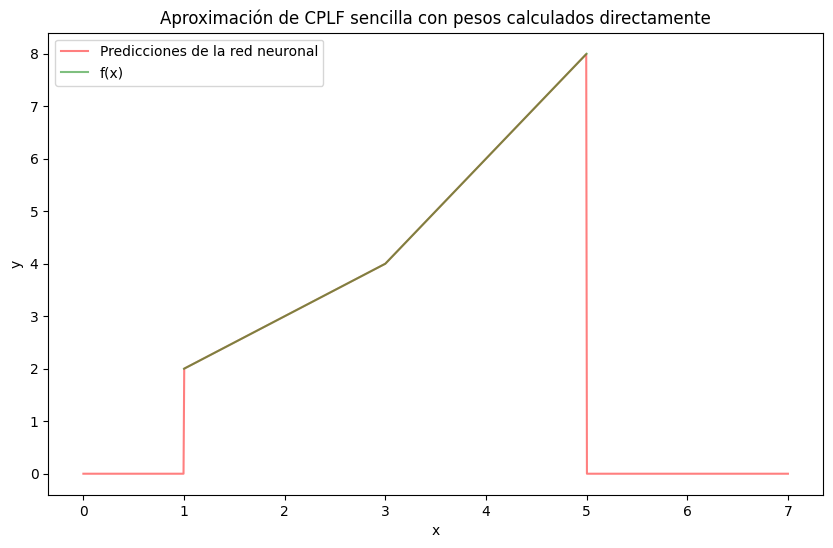

In [7]:
points = [[1,2],[3,4],[5,8]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

### Función CPLF formada por una función decreciente y una creciente, en dicho orden.
$f1(x) = m1*x + n1$, con m = -1 y n = 5, en $x \in [1,3]$

$f2(x) = m2*x + n2$, con m = 2 y n = -4, en $x \in [3,5]$

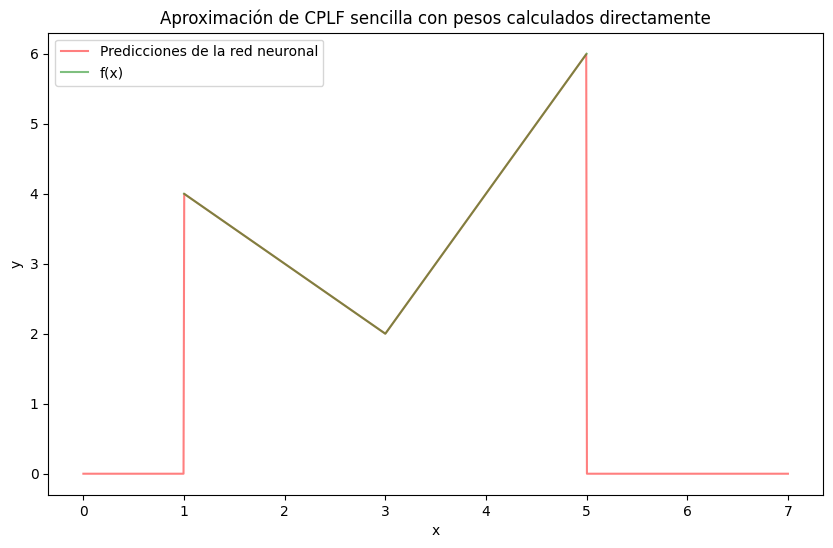

In [8]:
points = [[1,4],[3,2],[5,6]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

Pendiente de la segunda función es menor que la pendiente de la primera función, es decir supongamos que nuestra CPLF está formada por dos funciones lineales.

## Función CPLF formada por dos funciones lineales crecientes

$f1(x) = m1*x + n1$, con m = 2 y n = 1, en $x \in [1,3]$

$f2(x) = m2*x + n2$, con m = 1 y n = 4, en $x \in [3,5]$

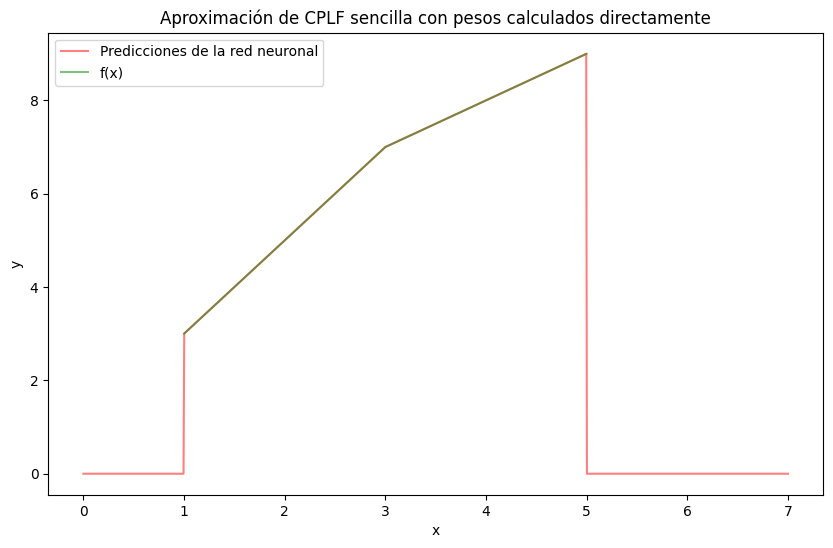

In [9]:
points = [[1,3],[3,7],[5,9]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

## Función CPLF formada por una función lineal creciente y una decreciente, en dicho orden

$f1(x) = m1*x + n1$, con m = 2 y n = 1, en $x \in [1,3]$

$f2(x) = m2*x + n2$, con m = -2 y n = 13, en $x \in [3,5]$

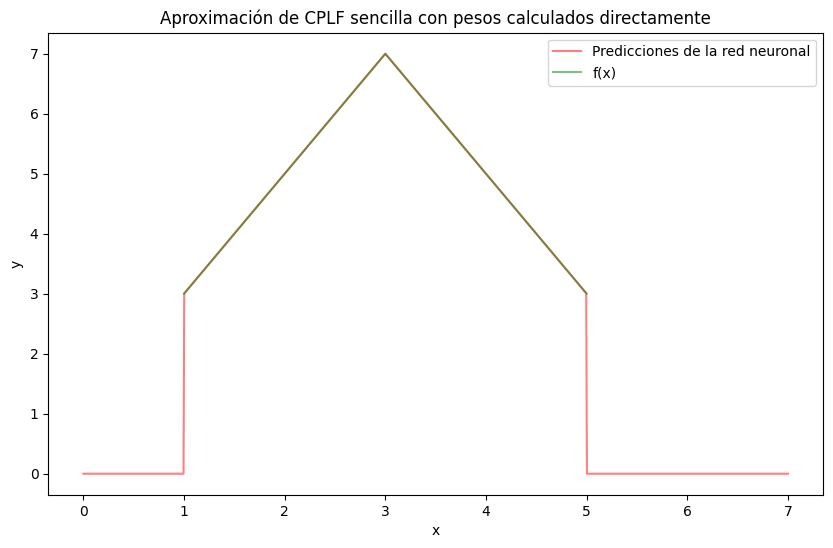

In [10]:
points = [[1,3],[3,7],[5,3]]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

## Teorema final

Si tenemos una función a trozos continua lineal, podemos aproximar esta mediante una red neuronal:

### Ejemplo 1
$
$f(x)$ = \begin{cases} 
    x + 2 & \text{si } x \in [-10,0)\\
    -x + 2 & \text{si } x \in [0, 2)\\
    x - 2 & \text{si } x >= [2,10)
\end{cases}
$

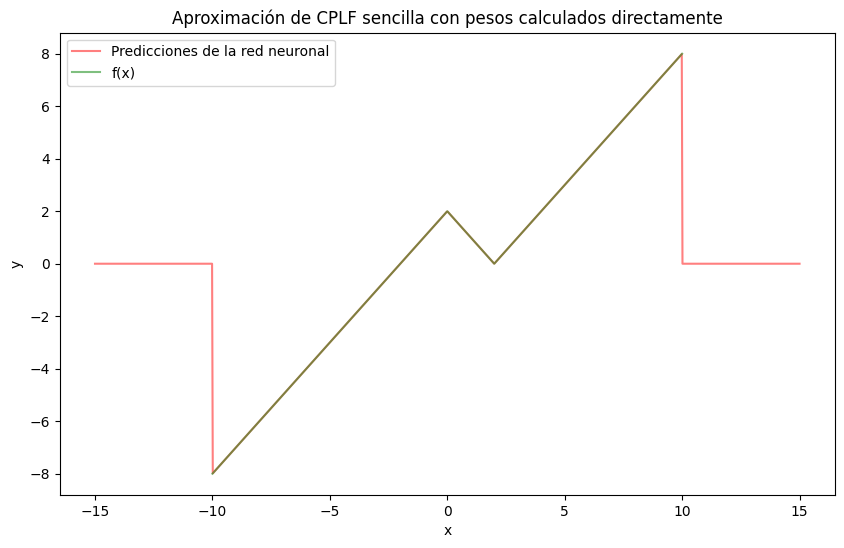

In [12]:
# Definir una lista de puntos [(x1, y1), (x2, y2), ..., (xn, yn)]
points = [(-10, -8), (0, 2), (2, 0), (10, 8)]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(-15, 15, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

### Ejemplo 2

$
$f(x)$=
\begin{cases} 
    3x + 1 & \text{si } x \in [-10, -2) \\
    2x - 1 & \text{si } x \in [-2, 1) \\
    x & \text{si } x \in [1, 4) \\
    -0.5x + 4 & \text{si } x \in [4,10) 
\end{cases}
$

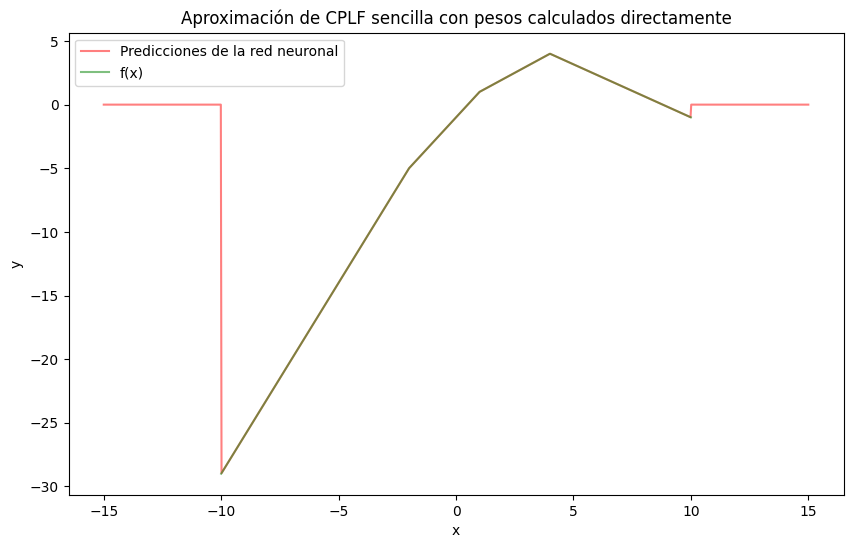

In [13]:
# Definir una lista de puntos [(x1, y1), (x2, y2), ..., (xn, yn)]
points = [(-10, -29), (-2, -5), (1, 1), (4, 4), (10, -1)]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(-15, 15, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

## Ejemplo 3

Puntos cualquieras, forman directamente una CPLF, es más sencillo así.

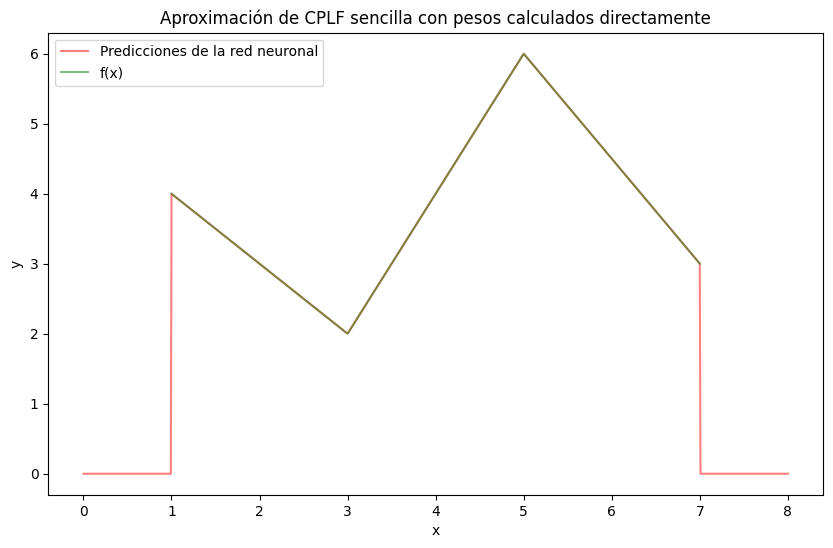

In [14]:
# Definir una lista de puntos [(x1, y1), (x2, y2), ..., (xn, yn)]
points = [(1, 4), (3, 2), (5, 6), (7, 3)]
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 8, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='Predicciones de la red neuronal', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)  # Línea que conecta los puntos
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de CPLF sencilla con pesos calculados directamente')
plt.legend()
plt.show()

# Entropía persistente como medida de similitud y determinio de número de puntos a dividir una función continua no lineal para su aproximación

In [16]:
from tqdm import tqdm

# pe siilarirty
epsilon_threshold = 0.00005
min_points = 5
max_points = 1000   
dominio =[-10,10]
funcion=np.sin
x_train, y_train = generate_training_data(funcion, (dominio[0], dominio[1]), 1000)
dgmsF = calculatePersistenceDiagrams_LowerStar(x_train,y_train)
dgmF = obtainDiagramDimension(dgmsF,0)
dgmFL = limitDiagramLowerStar(dgmF,max(y_train))
entropyF = computePersistenceEntropy(dgmFL)

def calculate_entropy_for_points(n_points, x_data, y_data):
    x_values = np.linspace(-10,10,n_points)
    points = [[x.item(), funcion(x).item()] for x in x_values]
    points
    
    model = BaricentricNetworkTf(points)
    
    y_aprox = model(x_train)
    dgms = calculatePersistenceDiagrams_LowerStar(x_train,y_aprox)
    dgm = obtainDiagramDimension(dgms,0)
    dgmL = limitDiagramLowerStar(dgm,max(y_aprox))
    entropy = computePersistenceEntropy(dgmL) 
    return entropy, y_aprox
    

# Búsqueda del número mínimo de segmentos
for n_points in tqdm(range(min_points, max_points + 1)):
    entropyAprox, y_BNN= calculate_entropy_for_points(n_points, x_train, y_train)
    error = np.abs(entropyF-entropyAprox)
    if error <= epsilon_threshold:
        print(f"Minimum number of points required for correct aproximation epsilon <= {epsilon_threshold}: {n_points}")
        plt.figure(figsize=(10, 6))
        plt.plot(x_train, y_BNN, 'r-', label=f'$BNN(x), H(BNN(x)) = {entropyAprox}$', alpha=0.5)
        plt.plot(x_train, y_train, 'g-', label=f'$f(x), H(f(x)) = {entropyF}$', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim((dominio[0],dominio[1]))
        plt.title(f'Aproximación función no lineal continua vía BNN, epsilon = {epsilon_threshold}, segmentos requeridos: {n_points}')
        plt.legend(loc="upper left")
        plt.show()
        break

 32%|██████████████████████████▏                                                      | 322/996 [10:58<22:58,  2.04s/it]


KeyboardInterrupt: 

  4%|███▎                                                                             | 40/996 [00:00<00:02, 387.05it/s]

Minimum number of points required for correct aproximation mse <= 5e-05: 62


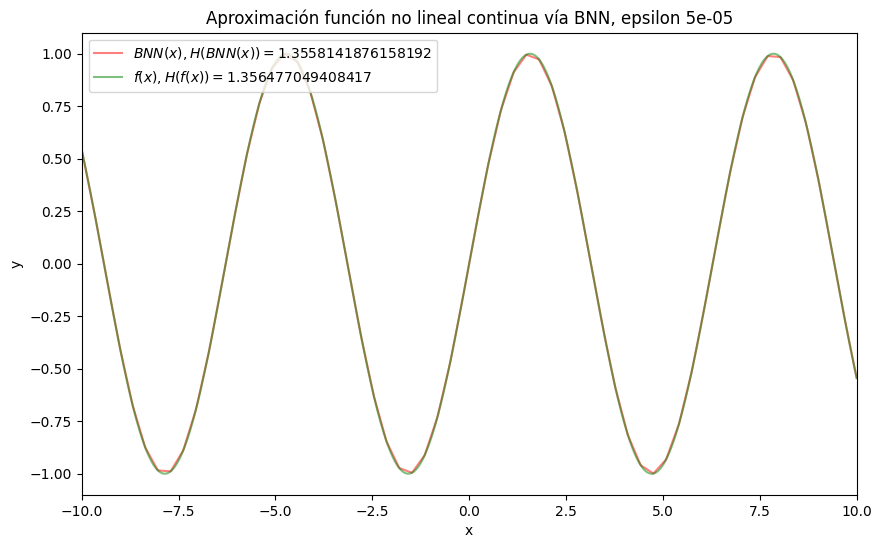

  6%|████▋                                                                            | 57/996 [00:00<00:06, 137.49it/s]


In [19]:
# mse
from sklearn.metrics import mean_squared_error
mse_threshold = 0.00005
min_points = 5
max_points = 1000   
dominio =[-10,10]
funcion=np.sin
x_train, y_train = generate_training_data(funcion, (dominio[0], dominio[1]), 1000)
dgmsF = calculatePersistenceDiagrams_LowerStar(x_train,y_train)
dgmF = obtainDiagramDimension(dgmsF,0)
dgmFL = limitDiagramLowerStar(dgmF,max(y_train))
entropyF = computePersistenceEntropy(dgmFL)

# Búsqueda del número mínimo de segmentos
for n_points in tqdm(range(min_points, max_points + 1)):
    entropyAprox, y_aprox = calculate_entropy_for_points(n_points, x_train, y_train)
    
    if mean_squared_error(y_aprox, y_train) <= mse_threshold:
        print(f"Minimum number of points required for correct aproximation mse <= {mse_threshold}: {n_points}")
        plt.figure(figsize=(10, 6))
        plt.plot(x_train, y_aprox, 'r-', label=f'$BNN(x), H(BNN(x)) = {entropyAprox}$', alpha=0.5)
        plt.plot(x_train, y_train, 'g-', label=f'$f(x), H(f(x)) = {entropyF}$', alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim((dominio[0],dominio[1]))
        plt.title(f'Aproximación función no lineal continua vía BNN, epsilon {mse_threshold}')
        plt.legend(loc="upper left")
        plt.show()
        break

## Similitud redes neuronales mediante PE

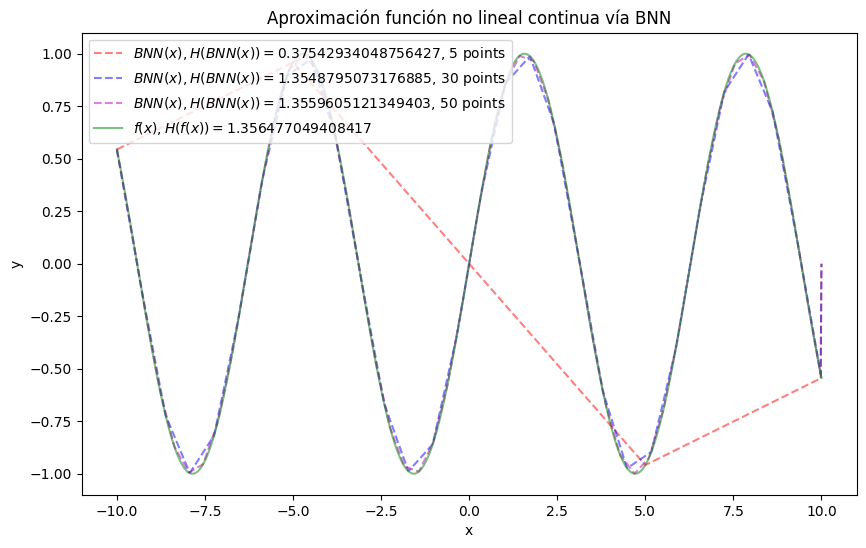

In [25]:
# Definir colores para cada número de segmentos
colors = ['r', 'b', 'm']  # Puedes elegir más colores si tienes más segmentos
entropies = [entropyF]
plt.figure(figsize=(10, 6))
for idx, n_points in enumerate([5, 30, 50]):
    # Calcular la entropía y la aproximación
    entropyAprox, y_aprox = calculate_entropy_for_points(n_points, x_train, y_train)
    entropies.append(entropyAprox)
    # Dibujar la aproximación con el color correspondiente
    plt.plot(x_train, y_aprox, f'{colors[idx]}--', 
             label=f'$BNN(x), H(BNN(x)) = {entropyAprox}$, {n_points} points', alpha=0.5)

# Dibujar la función original
plt.plot(x_train, y_train, 'g-', label=f'$f(x), H(f(x)) = {entropyF}$', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Aproximación función no lineal continua vía BNN')
plt.legend(loc="upper left")
plt.show()
